In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
from skimage.data import imread
import os,cv2
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv', 'train_images', 'test_images']


In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
train.head(5)



,filename,food_type
0,1dbaa9de-dbb6-11e8-840e-fa00c4a9e605.jpg,apple_pie
1,1dbe160a-dbb6-11e8-8c22-fa00c4a9e605.jpg,apple_pie
2,1dbe51cc-dbb6-11e8-977b-fa00c4a9e605.jpg,apple_pie
3,1dbe8482-dbb6-11e8-8b6a-fa00c4a9e605.jpg,apple_pie
4,1dbeefb4-dbb6-11e8-9d47-fa00c4a9e605.jpg,apple_pie


## Select 75 pics out of 750 pics from 101 classes

### Train only with 10% data

In [3]:
y = train.food_type

In [4]:
#100 / 750

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train.index, train.food_type, test_size=0.1, random_state=1, stratify=train.food_type)
#x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.1, random_state=1, stratify=y_val)

In [6]:
print(x_val)

Int64Index([14225, 20368,  6479, 73227, 35282, 57032, 28755,  8995, 18371,
             8660,
            ...
            42112, 38629, 36892, 27274, 40796, 50974, 44790, 27724, 73447,
            65687],
           dtype='int64', length=7575)


In [7]:
X = train.iloc[x_val]

In [8]:
print(X.describe())

                                        filename     food_type
count                                       7575          7575
unique                                      7575           101
top     2a523bc6-dbb6-11e8-928f-fa00c4a9e605.jpg  french_fries
freq                                           1            75


## Resize all the images

In [9]:
from tqdm import tqdm
train_dir = '../input/train_images/train_images'

images = []
train_types = []

train_files = [train_dir + '/' + filename for filename in X.filename]
print(len(train_files))

7575


In [10]:
for filename in tqdm(train_files):
    if filename.endswith('jpg'):
        try:
            images.append(cv2.resize(cv2.imread(filename), (224,224), interpolation=cv2.INTER_CUBIC))
            train_types.append(train[train_dir + '/' + train['filename'] == filename]['food_type'])
        except Exception as e:
            print(str(e))



100%|██████████| 7575/7575 [02:37<00:00, 48.20it/s]


In [11]:
images = np.array(images)


In [12]:
print(images.shape)

(7575, 224, 224, 3)


In [13]:
#train_types = np.array(train_types)
#train_types =train_types[:1000]
#print(len(train_types[1]))
#print(train_types[20][:1])
train_types_arr = np.concatenate(train_types)
#train_types_arr.reshape(train_types_arr.shape[0],1)
print(train_types_arr)


['chicken_curry' 'creme_brulee' 'bread_pudding' ... 'falafel' 'takoyaki'
 'scallops']


## Show resize images

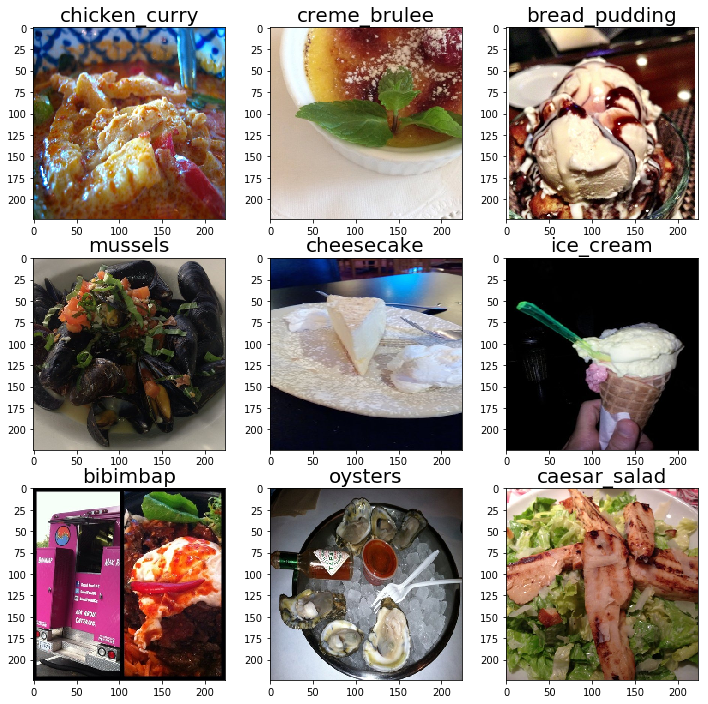

In [14]:
_, ax = plt.subplots(3,3, figsize=(12,12))
for i in range(3):
    for j in range(3):
      ax[i,j].imshow(cv2.cvtColor(images[(i*200)+j], cv2.COLOR_BGR2RGB))
      ax[i,j].axis('on')
      #ax[i,j].set_title(train_types_arr[(i*200)+j], size = 20)
      ax[i,j].set_title(train_types_arr[(i*200)+j], size = 20)

In [15]:

print(train_types_arr.shape)

(7575,)


## One-hot processing the food_type
### Turn food_type from one column to 101 columns with 0 and 1

## Train_test_split stratify by food_type (75 --> 60 to train, 15 to val)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(images, train_types_arr, test_size=0.2, random_state=1, stratify=train_types_arr)
#x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.1, random_state=1, stratify=y_val)

In [17]:
#plt.hist(train_types_arr,101)

In [18]:
print(x_train.shape)

(6060, 224, 224, 3)


In [19]:
print(y_train.shape)
print(y_val.shape)
#print(y_test.shape)

(6060,)
(1515,)


In [20]:
print(y_val)

['baby_back_ribs' 'chicken_curry' 'chocolate_cake' ... 'churros' 'mussels'
 'club_sandwich']


In [21]:
y_train_dummy = pd.get_dummies(y_train)
y_val_dummy = pd.get_dummies(y_val)
#y_test_dummy = pd.get_dummies(y_test)
#print(y_train_dummy.head())
#print(y_val_dummy.head())
#print(y_test_dummy.head())

In [22]:
print(y_val_dummy.head())

   apple_pie  baby_back_ribs  baklava   ...     tiramisu  tuna_tartare  waffles
0          0               1        0   ...            0             0        0
1          0               0        0   ...            0             0        0
2          0               0        0   ...            0             0        0
3          0               0        0   ...            0             0        0
4          0               0        0   ...            0             0        0

[5 rows x 101 columns]


In [23]:
y_train_dummy = np.array(y_train_dummy)
y_val_dummy = np.array(y_val_dummy)
#print(y_val_dummy[0].shape)
#y_test_dummy = np.array(y_test_dummy)



print(y_train_dummy[0].shape)
print(y_val_dummy[0].shape)
#print(y_test_dummy[0].shape)

(101,)
(101,)


## Then gonna train the model with x and one-hot y

### First, data generator

In [24]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [25]:
print(x_train.ndim)

4


In [26]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.125,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.125,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False, # randomly flip images
    rescale=1./255,
    fill_mode='nearest')
datagen.fit(x_train)
generator = datagen.flow(x_train, y_train_dummy, batch_size=32)
val_generator = datagen.flow(x_val, y_val_dummy, batch_size=32)

## Build Up the Model

In [27]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
from keras.layers import Input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
import keras.backend as K
from keras.optimizers import SGD, RMSprop, Adam

In [28]:
from keras.regularizers import l2
K.clear_session()

base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
x = base_model.output
x = AveragePooling2D(pool_size=(5, 5))(x)
x = Dropout(.4)(x)
x = Flatten()(x)
predictions = Dense(101, init='glorot_uniform', W_regularizer=l2(.0005), activation='softmax')(x)

model = Model(input=base_model.input, output=predictions)

219062272/219055592 [==============================] - 3s 0us/step


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(101, activation="softmax", kernel_initializer="glorot_uniform", kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


## Full layer Training with change of learning rate

In [29]:
for layer in model.layers:
    layer.trainable = True

In [30]:
model.compile(optimizer=SGD(lr=.01, momentum=.9), loss='categorical_crossentropy', metrics=['accuracy','top_k_categorical_accuracy'])

In [31]:
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau
def schedule(epoch):
    if epoch < 15:
        return .01
    elif epoch < 28:
        return .002
    else:
        return .0004
lr_scheduler = LearningRateScheduler(schedule)


In [32]:
food_model = model.fit_generator(generator,
                    validation_data=val_generator,
                    nb_val_samples=10,
                    samples_per_epoch=x_train.shape[0]/10,
                    nb_epoch=32,
                    verbose=1,
                    callbacks=[lr_scheduler])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=18.0, epochs=32, validation_steps=10)`
  import sys


Epoch 1/32
18/18 [==============================] - 83s 5s/step - loss: 4.8258 - acc: 0.0122 - top_k_categorical_accuracy: 0.0590 - val_loss: 4.9619 - val_acc: 0.0219 - val_top_k_categorical_accuracy: 0.0750
Epoch 2/32
18/18 [==============================] - 30s 2s/step - loss: 4.6963 - acc: 0.0312 - top_k_categorical_accuracy: 0.1128 - val_loss: 4.5910 - val_acc: 0.0688 - val_top_k_categorical_accuracy: 0.1719
Epoch 3/32
18/18 [==============================] - 31s 2s/step - loss: 4.5676 - acc: 0.0677 - top_k_categorical_accuracy: 0.1441 - val_loss: 4.8469 - val_acc: 0.0594 - val_top_k_categorical_accuracy: 0.2344
Epoch 4/32
18/18 [==============================] - 30s 2s/step - loss: 4.3129 - acc: 0.0972 - top_k_categorical_accuracy: 0.2656 - val_loss: 4.3423 - val_acc: 0.1469 - val_top_k_categorical_accuracy: 0.2906
Epoch 5/32
18/18 [==============================] - 31s 2s/step - loss: 3.9627 - acc: 0.1337 - top_k_categorical_accuracy: 0.3490 - val_loss: 3.7749 - val_acc: 0.2174 -

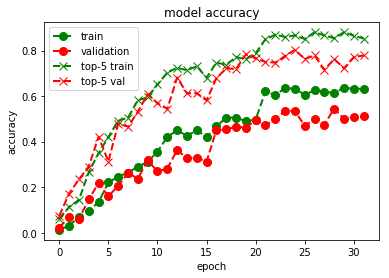

In [34]:
plt.plot(food_model.history['acc'],color='green', marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.plot(food_model.history['val_acc'],color='red', marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.plot(food_model.history['top_k_categorical_accuracy'],color='green', marker='x', linestyle='dashed',linewidth=2, markersize=8)
plt.plot(food_model.history['val_top_k_categorical_accuracy'],color='red', marker='x', linestyle='dashed',linewidth=2, markersize=8)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation','top-5 train','top-5 val'], loc='upper left')

plt.show()

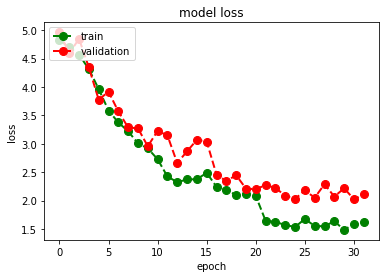

In [35]:
plt.plot(food_model.history['loss'],color='green', marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.plot(food_model.history['val_loss'],color='red', marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()